In [15]:
print('Below of this delete or take it out of the project')

Below of this delete or take it out of the project


In [16]:
# Delete or cut it out from the project.
# forest_data_list = forest_data.values
# type(forest_data_list)

In [17]:
# print("Dataset\t\tPercent")
# training = np.sum(train_proj)/len(train_proj)
# valid = np.sum(validation_proj)/len(validation_proj)
# test = np.sum(test_proj)/len(test_proj)
# total = training+valid+test
# print("Training\t"+str(training))
# print("Validation\t"+str(valid))
# print("Test\t\t"+str(test))
# print("Total\t\t"+str(total))

In [18]:
#plot scatter using label 0 k-means
# #filter rows of original data
# filtered_label0 = forest_train_proj[forest_train_labels == 0]
#
# #plotting the results
# plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
# plt.show()

In [19]:
#Getting unique labels plot
#
# u_labels = np.unique(forest_train_labels)
#
# #plotting the results:
#
# for i in u_labels:
#     plt.scatter(forest_train_proj[forest_train_labels == i , 0] , forest_train_proj[forest_train_labels == i , 1] , label = i)
# plt.legend()
# plt.show()

In [20]:
#Getting the Centroids
# centroids = kmeans.cluster_centers_
# u_labels = np.unique(forest_train_labels)
#
# #plotting the results:
#
# for i in u_labels:
#     plt.scatter(forest_train_proj[forest_train_labels == i , 0] , forest_train_proj[forest_train_labels == i , 1] , label = i)
# plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
# plt.legend()
# plt.show()

In [21]:
# # Customs transformers
# from sklearn.preprocessing import FunctionTransformer
# center_function = lambda x: x-x.mean()
# transformer = FunctionTransformer(center_function, validate=True)
# # X = np.array([[0, 1], [2, 3]])
# # Since FunctionTransformer is no-op during fit, we can call transform directly
# # transformer.transform(X)

In [22]:
# #fit: kmeans return type: kmeans
# for k in k_values:
#     kmeans = KMeans(n_clusters=k,random_state=23508893).fit(forest_train_proj) # fit vs fit_transform
# forest_train_labels = kmeans.labels_
# forest_train_labels
# #fit_transform: kmeans return type: numpy array
# for k in k_values:
#     kmeans = KMeans(n_clusters=k,random_state=23508893).fit_transform(forest_train_proj) # fit vs fit_transform

In [23]:
# plt.scatter(forest_train_proj[:, 0], forest_train_proj[:, 1], c=forest_train_proj[:, 2], cmap='hot')
# forest_train_proj.shape

# CSCI 381/780 (Fall 2022) - Project 2

**Due Date: Monday, November 14 by 4 PM**

## Description
In this project you will construct machine learning models on two different real-world datasets using unsupervised learning and regression.

## Instructions
1. In this project you will write code to construct machine learning models and write responses to questions concerning the performance of said models. Please complete all sections below, adding new *Code* or *Markdown* cells as appropriate to answer the questions.
2. There are many Scikit-learn functions that leverage randomness to generate results. For these functions, a pseudorandom generator can be initialized using a seed value by passing the parameter `random_state=XXX`, where `XXX` is some number between 1 and 2^31-1. For each of these functions, **you will utilize your CUNY ID number** to initialize the function. Functions include:
- `ShuffleSplit`
- `KFold`
- `KMeans`
- `GridSearchCV`
- `Lasso`
- `MLPRegressor`
3. You will **work independently** on the project. Please make use of the *Python Data Science Reference Materials* posted on Blackboard, or **come to office hours should you need further assistance**.
4. You will submit a single Jupyter notebook containing all code and written responses via Blackboard by the due date listed above.

## Grading

### Running Code
Your Jupyter notebook must be able to run from start to finish **without error**. Please turn any cell that contains scratch work or other non-executable items to *Raw*. **Notebooks that cannot run to completion will receive a grade of 0**.


### Rubric

|**Part**|1.1|1.2|2.1|2.2|2.3|2.4|2.5|2.6|**Total**|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|**%**|10|30|15|5|10|10|10|10|100|


# Part 1: Clustering

In this part of the project, you will be using data collected by the US Geological Survey and the US Forest Service. The data describes various cartographic and geologic features related to forest cover in US wilderness areas, with each sample representing a 30 x 30 meter cell.

The **goal** will be to *identify clusters* that represent forest cover types, and using these clusters *extract relationships* between forest covers and the provided cartographic/geologic features.

In [24]:
#library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

In [25]:
# load the dataset
cover_column_names=["Elevation","Aspect","Slope",
              "Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology",
              "Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon",
              "Hillshade_3pm","Horizontal_Distance_To_Fire_Points"]
wilderness_cols =["Wilderness_"+str(i) for i in range(4)]
soil_col =["Soil_"+str(i) for i in range(40)]
cover_columns_names = cover_column_names + wilderness_cols + soil_col

## 1.1 Load Data
Set the variable `COVER_FILE` to the **full path** to the forest cover dataset (**forest_cover_dataset.csv**) on your system. Load the file into a dataframe (you may initialize the column names using the header list `cover_column_names`), then:
1. Determine the number and types of features.
2. Perform a **ShuffleSplit** of the data into training/validation/test sets, 60%/20%/20%.
3. **Center** the training/validation/test splits (fit on the training set, then transform the validation/test sets).

In [26]:
# cover_file = f'C:/Users/tanzi/CS Lang IDE/PycharmProjects/Project-2/UTF-8_forest_cover_dataset.csv'
#search later, how to auto complete full path. https://www.youtube.com/watch?v=3Spa10-mwsw


cover_file = f'C:/Users/tanzi/CS Lang IDE/PycharmProjects/Jonathan/Project2/Project-2/UTF-8_forest_cover_dataset.csv'
forest_data = pd.read_csv(cover_file, names=cover_columns_names)
forest_data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_30,Soil_31,Soil_32,Soil_33,Soil_34,Soil_35,Soil_36,Soil_37,Soil_38,Soil_39
0,2825,265,17,319,108,2298,174,245,209,342,...,0,0,1,0,0,0,0,0,0,0
1,2719,198,34,134,76,2352,187,245,167,693,...,0,0,0,0,0,0,0,0,0,0
2,3146,152,14,212,41,940,237,239,130,2007,...,0,0,0,0,0,0,0,0,0,0
3,2882,18,18,95,-3,485,203,199,128,342,...,1,0,0,0,0,0,0,0,0,0
4,2912,349,17,283,57,2729,187,210,160,2201,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280246,2919,224,18,85,24,451,193,254,193,1436,...,0,0,0,0,0,0,0,0,0,0
280247,2151,114,29,42,29,499,254,197,49,731,...,0,0,0,0,0,0,0,0,0,0
280248,3008,221,14,418,99,5346,202,253,185,1300,...,0,0,0,0,0,0,0,0,0,0
280249,2923,58,12,134,12,2213,228,214,117,424,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Determine the number of features
num_features = len(cover_columns_names)
print('Number of features: ', num_features)

Number of features:  54


In [28]:
#change the variable name

#Determine nature of object types
census_cat_columns=dict()
census_cat_columns_idx=dict()
census_num_columns_idx=dict()
for col in cover_columns_names:
    if forest_data[col].dtype == 'int64':
        census_cat_columns[col]=forest_data[col].unique()
        census_cat_columns_idx[col]=forest_data.columns.get_loc(col)
        print(col,":",census_cat_columns[col])
    elif np.issubdtype(forest_data.at[0,col], np.number):
        census_num_columns_idx[col]=forest_data.columns.get_loc(col)

Elevation : [2825 2719 3146 ... 3626 3541 3607]
Aspect : [265 198 152  18 349 202 102  90   9 117 315  40 110   3 359 106 108 150
  32 347 127  62 123 176  53 100 180 166 189 243 294  72 112  22  45 274
  60 344  28 299  65  34 169  73  43  82 262 232  83  37 329  49 269  66
 140 133  33  61 350  63  74 326 193 225 226 342 318 276 316 167 303  55
 131  69 251  19 220  52 135  11 270  26  14 357  59  42  51 158 204 138
 356  78  12 306 165 238 235 352 219 307 119 311 351  36  95  25 163 162
 272  17 340 113  41 348   0 324  35  68  13  20 334 343 304  85  96 146
  99 143 301  79  98 336 196  21 101 116 170 317 245  38  92 111 211 354
 121   8 249 157 277  31   4 181 322 105 288 332 185 187 241 199 172 289
 207 281 291 222 107  93 302 195  56 247 314 327   7 287 263 333 309 209
 148 331   1 266   5  91  15 268  16 145 184 254 194  71 337 183 346 149
  80 285  58  57  89 118 330  50 125 296 182  27 231 248  54  70  97 103
 156 147  76  23  67 338 256 174 323 358 177 267 300 215  30 206 20

In [29]:
# Perform a **ShuffleSplit** of the data into training/validation/test sets, 60%/20%/20%.
forest_data_list = np.array(forest_data)
from sklearn.model_selection import ShuffleSplit
split_test = ShuffleSplit(n_splits=1,test_size=0.2, random_state=23508893)
for train_index, test_index in split_test.split(forest_data_list):
    forest_train_proj_full = forest_data_list[train_index,:]
    forest_test_proj = forest_data_list[test_index,:]


split_validation = ShuffleSplit(n_splits=1,test_size=0.25, random_state=23508893)
for train_index, validation_index in split_validation.split(forest_train_proj_full):
    forest_train_proj = forest_train_proj_full[train_index,:]
    forest_validation_proj = forest_train_proj_full[validation_index,:]


In [30]:
# #Maybe comment this out?
# print("Dataset\t\tPercent")
# print("Training\t" + str(np.sum(forest_train_proj) / len(forest_train_proj)))
# print("Validation\t" + str(np.sum(forest_validation_proj) / len(forest_validation_proj)))
# print("Test\t\t" + str(np.sum(forest_test_proj) / len(forest_test_proj)))

1. How would want us to solve 1.1.3 [center the training]. Should I use customs transformer? If so, during the next step, should I use data_centered_train or forest_train_proj?
2. forest_train_proj = dataset (X) | data_center_train = first center randomly
3.


In [31]:
# Customs transformers
from sklearn.preprocessing import FunctionTransformer
center_function = lambda x: x-x.mean()
transformer = FunctionTransformer(center_function, validate=True)

In [32]:
# **Center** the training/validation/test splits (fit on the training set, then transform the validation/test sets).
# use this data for clustering. Ask the professor if I should use data_centered or not_center
data_centered_train = transformer.fit_transform(forest_train_proj)
data_centered_valid = transformer.transform(forest_validation_proj)
data_centered_test = transformer.transform(forest_test_proj)

data_centered_full_train = transformer.transform(forest_train_proj_full)

data_centered_test

array([[2868.87819823,  160.87819823, -151.12180177, ..., -154.12180177,
        -154.12180177, -154.12180177],
       [2777.87819823,   48.87819823, -140.12180177, ..., -154.12180177,
        -154.12180177, -154.12180177],
       [2378.87819823,   60.87819823, -125.12180177, ..., -154.12180177,
        -154.12180177, -154.12180177],
       ...,
       [2783.87819823,  125.87819823, -130.12180177, ..., -154.12180177,
        -154.12180177, -154.12180177],
       [2359.87819823,  152.87819823, -132.12180177, ..., -154.12180177,
        -154.12180177, -154.12180177],
       [3028.87819823,   38.87819823, -146.12180177, ..., -154.12180177,
        -154.12180177, -154.12180177]])

In [33]:
# # sns.pairplot(forest_train_proj[])
# plt.plot(forest_train_proj)
# plt.show()

## 1.2 $k$-Means Clustering

1. Cluster the *training* dataset using ```KMeans``` from Scikit-learn using the values for $k$ below. You can utilize the default implementation in Scikit-learn, which is $k$-means$++$. Construct models for each value of $k$ specified in the ``k_values`` array below.
2. Apply the trained models to the validation dataset.
3. Compute the **mean** inertia for each value of $k$ on the training and validation datasets. For the training data, you can extract the *total* (**unnormalized**) inertia from the trained models via their respective ```inertia_```. For the validation models, you can utilize the function ```total_inertia``` provided below.
4. Plot the mean inertias for all values of $k$ and for both the training and validation sets on a single plot. Based on the elbow method, which value of $k$ should be chosen so that the model will generalize to new data?
5. The *Silhouette Coefficient* is another cluster performance metric that combines intra-cluster distance with inter-cluster distances from clusters in close proximity to each other. Utilize Scikit-learn's ```silhouette_score``` function [(documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score) to compute the silhouette coefficient for all values of $k$ on the *validation* set. Plot these values and determine via the elbow method which value of $k$ should be chosen. How does this value compare to the one chosen using mean inertia?
6. Using whichever value of $k$ you think is the best based on steps 4) and 5), create a plot for each feature that contains [boxplots](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html#sphx-glr-gallery-statistics-boxplot-demo-py) of that feature for each cluster. Based upon these plots, determine which features you think are meaningful in discriminating between the clusters, as well as any other trends you observe.

### Please Read!
You may benefit from parallelizing the creation of the $k$-means models by using the Python package ```joblib```. I've included a code template below that you can customize. For additional details, please refer to [joblib's documentation](https://joblib.readthedocs.io/en/latest/parallel.html).

## Cluster the *training* dataset using ```KMeans```. Construct models for each value of $k$ specified in the ``k_values`` array
### Comment:
1. Should I use fit or fit_transform?
2. fit_predict() vs predict() <- I think I got my answer| labels vs predict; what is labels?
3. whats the difference between writing out the parameter for iniit: 'kmean++' or not?
The reason why I ask, because I don't see any data difference with or without, even after adding n_init=k, where is interger of the list from k_value

In [34]:
k_values=list(range(2,11))+[15,20]

#n-clusters = int [not list]; figure out a way to get int.
from sklearn.cluster import KMeans
#fit: kmeans return type: kmeans

for k in k_values:
    kmeans = KMeans(n_clusters=k,random_state=23508893).fit(forest_train_proj) # fit vs fit_transform?

In [35]:
kmeans.cluster_centers_

array([[ 3.13485042e+03,  1.80206424e+02,  1.11966619e+01, ...,
         7.46339159e-02,  1.05495198e-02,  5.72458747e-17],
       [ 2.90396929e+03,  1.56102918e+02,  1.49163384e+01, ...,
         1.57549234e-02,  1.18161926e-02,  7.51276441e-03],
       [ 2.95963745e+03,  1.74061255e+02,  1.05181773e+01, ...,
         1.04083409e-17, -5.37764278e-17,  1.73472348e-17],
       ...,
       [ 2.98986947e+03,  1.48964153e+02,  1.37919242e+01, ...,
         1.78821590e-02,  4.36753193e-03,  3.90605686e-02],
       [ 2.95087006e+03,  1.81988272e+02,  1.42078879e+01, ...,
         1.66061235e-03,  1.97197717e-03,  9.34094447e-04],
       [ 3.05361060e+03,  1.14238266e+02,  1.09398159e+01, ...,
         2.62744217e-02,  3.32360207e-02,  1.54951718e-02]])

In [36]:
# y_predict = kmeans.fit_predict(forest_train_proj)
# y_predict
# plt.scatter(y_predict[:,0], y_predict, color = 'blue', label='label')
# # plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'black', marker="*", label='centroid')
#
# #check forest_train_labels, forest_train_proj, out: kmeans

## Apply the trained models to the validation data

In [37]:
train_predict = kmeans.predict(forest_train_proj)
train_predict

array([ 7,  3,  3, ...,  9, 13, 11])

In [38]:
# kmeans.fit_predict(forest_validation_proj)
# valid_predict = kmeans.predict(forest_validation_proj, train_predict)
valid_predict = kmeans.predict(forest_validation_proj)
valid_predict


array([11, 12, 13, ...,  7, 17,  4])

In [39]:
kmeans.cluster_centers_

array([[ 3.13485042e+03,  1.80206424e+02,  1.11966619e+01, ...,
         7.46339159e-02,  1.05495198e-02,  5.72458747e-17],
       [ 2.90396929e+03,  1.56102918e+02,  1.49163384e+01, ...,
         1.57549234e-02,  1.18161926e-02,  7.51276441e-03],
       [ 2.95963745e+03,  1.74061255e+02,  1.05181773e+01, ...,
         1.04083409e-17, -5.37764278e-17,  1.73472348e-17],
       ...,
       [ 2.98986947e+03,  1.48964153e+02,  1.37919242e+01, ...,
         1.78821590e-02,  4.36753193e-03,  3.90605686e-02],
       [ 2.95087006e+03,  1.81988272e+02,  1.42078879e+01, ...,
         1.66061235e-03,  1.97197717e-03,  9.34094447e-04],
       [ 3.05361060e+03,  1.14238266e+02,  1.09398159e+01, ...,
         2.62744217e-02,  3.32360207e-02,  1.54951718e-02]])

### Comment
1. Is the func supposed to be for loop of the kvalues? and the data is train_model?
2. Create a function for for-loop, where it takes list, data

In [40]:
# from joblib import Parallel, delayed, parallel_backend
#
# with parallel_backend("loky", inner_max_num_threads=2):
#     results = Parallel(n_jobs=4)(delayed(func)(x, y) for x, y in data)
#     # which data?
#     # || x = forest_train_proj and y = data_centered_train?
#     # || x = k-mean and y = k-mean ++?
#     # || x = forest_train_proj and y = k-means
#     # func = center_function? or [cluster_centers_ or labels_] from k-means?

NameError: name 'data' is not defined

In [41]:
def total_inertia(dataset,centers,labels,distance=None,mean=True):
    # dataset= forest_validation_proj | centers = kmeans.cluster_centers_ | mean=false
    """
    Computes the total inertia (the intracluster variance) given a dataset and the cluster centers.
    
    Parameters
    ----------
    dataset : numpy.ndarray
        The dataset to evaluate.
    center : numpy.ndarray or list
        The list of cluster centers.
    distance : function
        A function that computes the pairwise distance between two samples.
        Default: Euclidean (l_2) distance
    mean : bool
        If True, returns the mean inertia.
        Default: True
        
    Returns
    -------
    total_inertia : float
       The mean inertia (if mean==True) or total inertia (if mean==False).
"""
    num_samples,_ = dataset.shape
    total_inertia=0
    if distance is None:
        distance=lambda x,y: np.linalg.norm(x-y)**2
    for i,sample in enumerate(dataset):
        center = centers[labels[i]]
        total_inertia += distance(sample,center)
    
    if mean:
        return total_inertia/num_samples
    else:
        return total_inertia

## Compute the **mean** inertia for each value of k on the training and validation datasets.
1. For the training data, you can extract the *total* (**unnormalized**) inertia from the trained models via their respective ```inertia_```.
2. For the validation models, you can utilize the function ```total_inertia``` provided below.

### Comment:
1. Given ```total-inertia``` has way to computer mean intertia, if we set mean to true. If that's the case, is that what you want us to use for training data as well?
2. what do you mean by ***via their respective*** ```inertia_``` ?
3. Mean inertia for train model, work, I think?
4. But for the output for valid, the mean sse is coming the same


In [42]:
# dataset= forest_train_proj | centers = kmeans.cluster_centers_ | labels = kmeans.labels | mean=true
# total_inertia(forest_train_proj,kmeans.cluster_centers_,kmeans.labels_,mean=True)

mean_train = []
for k in k_values:
    km= KMeans(n_clusters=k).fit(forest_train_proj)
    mean_train.append(km.inertia_)

In [43]:
mean_train

[392840587225.5417,
 275967015834.67804,
 213082084346.8964,
 169250708949.03207,
 148662469919.37567,
 128893004043.46007,
 116150242631.87961,
 106009973697.5817,
 97155517475.91335,
 70580293629.48798,
 57620513622.62424]

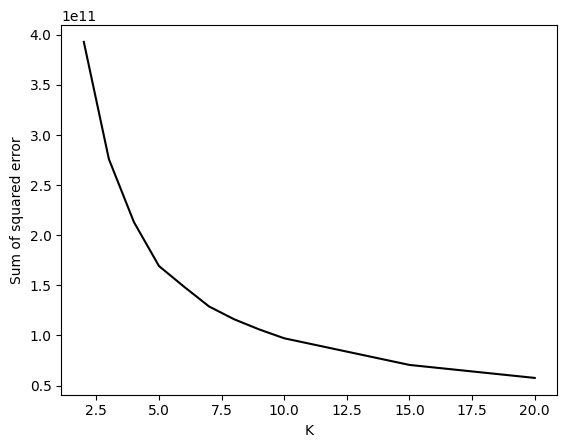

In [44]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_values, mean_train, color = 'black', label ='mean_train')

In [45]:
#combine mean_valid and mean_train cell
mean_valid = []
# dataset= forest_validation_proj | centers = kmeans.cluster_centers_ | mean=false

for k in k_values:
    forest_valid_inertia =total_inertia([valid_predict],kmeans.cluster_centers_,kmeans.labels_,mean=True, distance=None)
    km= KMeans(n_clusters=k).fit(forest_validation_proj)
    # valid_predict
    mean_valid.append(forest_valid_inertia)

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
mean_valid

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_values, mean_valid, color = 'blue', label ='mean_valid')

## Plot the mean inertias for all values of $k$ and for both the training and validation sets on a single plot.
1. Based on the elbow method, which value of $k$ should be chosen so that the model will generalize to new data?

# Part 2: Regression

In this part of the project, you will be utilizing a US database of crime and law enforcement statistics broken down by US Census communities. The **goal** will be to create *regression models* that predict *per capita violent crimes* (the response variable `ViolentCrimesPerPop`) for a given community based on these inputs. 

In [ ]:
crime_column_names= ['state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize',
                 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29',
                 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf',
                 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap',
                 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov',
                 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu',
                 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr',
                 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par',
                 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent',
                 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8',
                 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup',
                 'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous',
                 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded',
                 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal',
                 'OwnOccHiQuart', 'RentLowQ', 'RentMedian', 'RentHighQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc',
                 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85',
                 'PctSameCity85', 'PctSameState85', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps',
                 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic',
                 'PolicPerPop', 'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp',
                 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked',
                 'LandArea', 'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
                 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn', 'PolicBudgPerPop', 'ViolentCrimesPerPop']

## 2.1 Load Data
Set the variable `CRIME_FILE` to the **full path** to the forest cover dataset (**crime.csv**) on your system. Load the file into a dataframe (you may initialize the column names using the header list `crime_column_names`), then:
1. Determine the number and types of features.
2. Perform a **ShuffleSplit** of the data into training/validation/test sets, 60%/20%/20%. 
3. Split the **non-test data** (*training* + *validation* data) into **5 folds** for cross-validation purposes.
4. Perform any necessary preprocessing on dataset. This may include:
  * determining if any features should be dropped;
  * handling missing data, through imputation and/or complete case analysis. If you **perform imputation on numerical values**, please use **median** imputation.

**Please note!** The Scikit-learn function `SimpleImputer` does not work as expected when the feature to impute is numerical but the missing values are not. One way to solve this is to first replace the missing values with NaN values (e.g., `np.nan`) using the Pandas Dataframe method `replace` [(documentation)](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html).

In [ ]:
# crime_file = f'C:/Users/tanzi/CS Lang IDE/PycharmProjects/Project-2/UTF-8_crime.csv'
crime_file = f'C:/Users/tanzi/CS Lang IDE/PycharmProjects/Jonathan/Project2/Project-2/UTF-8_crime.csv'
crime_data = pd.read_csv(crime_file, names=crime_column_names)
crime_data

In [ ]:
# Determine the number of features
num_features = len(crime_column_names)
print('Number of features: ', num_features)

In [ ]:
#change the variable name

#Determine nature of object types
census_cat_columns=dict()
census_cat_columns_idx=dict()
census_num_columns_idx=dict()
for col in crime_column_names:
    if crime_data[col].dtype == 'object':
        census_cat_columns[col]=crime_data[col].unique()
        census_cat_columns_idx[col]=crime_data.columns.get_loc(col)
        print(col,":",census_cat_columns[col])
    elif np.issubdtype(crime_data.at[0,col], np.number):
        census_num_columns_idx[col]=crime_data.columns.get_loc(col)

In [ ]:
# Perform a **ShuffleSplit** of the data into training/validation/test sets, 60%/20%/20%.

#need to preprocess dateset. Change the object into encoding/numerical
crime_data_list = np.array(crime_data)
from sklearn.model_selection import ShuffleSplit
split_test = ShuffleSplit(n_splits=1,test_size=0.2, random_state=23508893)
for train_index, test_index in split_test.split(crime_data_list):
    crime_train_proj_full = crime_data_list[train_index,:]
    crime_test_proj = crime_data_list[test_index,:]


split_validation = ShuffleSplit(n_splits=1,test_size=0.25, random_state=23508893)
for train_index, validation_index in split_validation.split(crime_train_proj_full):
    crime_train_proj = crime_train_proj_full[train_index,:]
    crime_validation_proj = crime_train_proj_full[validation_index,:]


In [ ]:
print("Dataset\t\tPercent")
print("Training\t" + str(np.sum(crime_train_proj) / len(crime_train_proj)))
print("Validation\t" + str(np.sum(crime_validation_proj) / len(crime_validation_proj)))
print("Test\t\t" + str(np.sum(crime_test_proj) / len(crime_test_proj)))

In [ ]:
#peformance metric functions
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np

#A list of keys for the dictionary returned by p1_metrics
metric_keys = ['mse','mae','r2']

def p2_metrics(y_true,y_pred,negation=False):
    if negation:
        sign = -1
    else:
        sign = 1
    return {
        'mse': sign*mean_squared_error(y_true,y_pred),
        'mae': sign*mean_absolute_error(y_true,y_pred),
        'r2': sign*r2_score(y_true,y_pred)}

#This wrapper can be used to return multiple performance metrics during cross-validation
def p2_metrics_scorer(clf,X,y_true):
    y_pred=clf.predict(X)
    return p2_metrics(y_true,y_pred,negation=True)

## 2.2 Linear Regression

1. Construct a linear model using Scikit-learn's `LinearRegression` method with default parameters.
2. Report the following performance metrics on the **training and validation sets**:
    *Mean Squared Error*, *Mean Absolute Error*, and the *Coefficient of Determination ($r^2$)*.
    
    You can use the function `p2_metrics` for this purpose. Is this model underfitting the data? Is so, why?
3. Report the weights (coefficients) of the linear model and their associated features in ascending order.

    Larger weights indicate that their corresponding features have more influence in the model. Moreover, negative weights correspond to variables having negative correlation with the response variable, and vice versa.
    
    Using this interpretation, describe the most significant features and their correlation.

## 2.3 Linear Regression and PCA

1. Perform principal component analysis on the **training data**. You may use Scikit-learn's `PCA` function for this, which **automatically centers** the data prior to PCA. Using PCA, *choose the number of components* for which the total explained variance is $\ge 99\%$, and report this.
2. After determining the correct number of components, apply the PCA transformation to the **validation** and **test** sets.
3. Create another model via `LinearRegression` but using the data transformed by PCA
Construct a linear model using Scikit-learn's `LinearRegression` method with default parameters.
4. Report the same performance metrics as in 2.2 on the **validation set**. How does the model's performance compare to that of the model in 2.2?

## 2.4 LASSO

Utilizing *cross-validation* you will Construct an $\ell_1$-regularized linear model using Scikit-learn's `LASSO`:
1. Using `GridSearchCV`, determine the best choice of the hyperparameter $\alpha$ out of values in the list `alphas` below.
2. Report the time required to perform cross-validation via `GridSearchCV`. Report the mean and standard deviation of the performance metrics for the best performing model along with its associated hyperparameter. You may use the function `collate_ht_results` for this purpose.
3. Report the weights (coefficients) of the LASSO model and their associated features in ascending order. Note that LASSO attempts to set as many weights to zero in order to create a more parsimonious model while still maintaining regression performance. How many weights are non-zero?
 
### Please Read!
There are a few parameters for the `GridSearchCV` and `RandomizedSearchCV` functions that should be set:
- `scoring` - This controls the strategy to evaluate the performance of the cross-validated model on the test set, set it to `p2_metrics_scorer`.
- `refit` - This will refit an estimator using the best found parameters on the whole dataset, set it to `"mse"`
- `cv` - This will enable you to reuse your CV splits created in Part 2.1
    `n_jobs` - Number of jobs to run in parallel, if you have more than one core on your device (you should), set this to as many as you'd like to use, or to `-1` if you want to use all available cores.
- `return_train_score` - Setting this to `False` will reduce computational time.

In [ ]:
alphas = 10**np.linspace(1,-3,50)*0.5

In [ ]:
#Summarizes model performance results produced during hyperparameter tuning
def collate_ht_results(ht_results,metric_keys=metric_keys,display=True):
    ht_stats=dict()
    for metric in metric_keys:
        ht_stats[metric+"_mean"] = ht_results.cv_results_["mean_test_"+metric][ht_results.best_index_]
        ht_stats[metric+"_std"] = metric_std = ht_results.cv_results_["std_test_"+metric][ht_results.best_index_]
        if display:
            print("test_"+metric,ht_stats[metric+"_mean"],"("+str(ht_stats[metric+"_std"])+")")
    return ht_stats

## 2.5 Multilayer Perceptron (MLP)

Utilizing *cross-validation* you will construct an MLP regression model using Scikit-learn's `MLPRegressor`:
1. Using `GridSearchCV`, determine the best choice of hyperparameters out of the following possible values:
- *Number of hidden layers*: [1, 2, 3]
- *Number of neurons per layer*: [10, 20, 50]
- *Learning rate*: [1e-5, 1e-4, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100]

2. Report the time required to perform cross-validation via `GridSearchCV`. Report the mean and standard deviation of the performance metrics for the best performing model along with its associated hyperparameter. You may use the function `collate_ht_results` for this purpose.

 
### Please Read!
In addition to utilizing the same `GridSearchCV` parameters as in 2.5, the `MLPRegressor` function should have the following parameters set:
- `max_iter` -  This controls the maximum number of rounds of backpropagation/gradient descent; set it to 10,000.
- `early_stopping` - This will reserve a portion of the training data tha can be used to evaluate convergence progress in order to stop training early; set it to `True`.

## 2.6 Final Models

1. Using the full training set (**training + validation**), train *two* linear regression models, one with and without PCA preprocessing, then apply them to the test set. For LASSO and MLP, you can utilize the best models found during cross-validation and just apply them to the test set.
2. Create a bar chart of the three regression metrics for each model on the same plot.
3. How do the models's performances compare? What do the metrics reveal about the dataset?